In [2]:
import pandas as pd
import re
import nltk 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
twint_df = pd.read_csv(r"C:\Users\pc\Desktop\Year 2 Sem 2\Big Data Project\Step 2 project\Data\anime_tweets.csv")
twint_df.columns = ['anime_name','id', 'conversation_id', 'created_at', 'date_tweet','time_tweet', 'timezone', 'user_id','username','name','place',
       'tweet', 'language','mentions','urls','photos','replies_count','retweets_count','likes_count' 'hashtags', 'cashtags', 'link','retweet','quote_url','video','thumbnail','near','geo','source','user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date']
twint_df.shape

(98285, 33)

In [4]:
twint_df.head(1)

anime_name            id  conversation_id  \
0     naruto  1.510000e+18     1.510000e+18   

                                created_at date_tweet time_tweet  timezone  \
0  2022-03-25 23:56:23 Egypt Standard Time  3/25/2022   23:56:23       200   

        user_id username     name  ...  \
0  1.000000e+18  viege04  virgile  ...   

                                               video thumbnail near geo  \
0  https://twitter.com/doflvming0_/status/1507270...         0  NaN NaN   

  source user_rt_id  user_rt  retweet_id  reply_to retweet_date  
0    NaN        NaN      NaN         NaN       NaN           []  

[1 rows x 33 columns]

In [5]:
twint_english_df = twint_df.loc[twint_df['language'] == 'en']
tweets_analysis_df = twint_english_df[['anime_name','id','tweet']]
tweets_analysis_df.head

<bound method NDFrame.head of          anime_name            id  \
2            naruto  1.510000e+18   
7            naruto  1.510000e+18   
10           naruto  1.510000e+18   
17           naruto  1.510000e+18   
18           naruto  1.510000e+18   
...             ...           ...   
98280  demon slayer  1.510000e+18   
98281  demon slayer  1.510000e+18   
98282  demon slayer  1.510000e+18   
98283  demon slayer  1.510000e+18   
98284  demon slayer  1.510000e+18   

                                                   tweet  
2      Needs to be said Baryon mode Naruto still smok...  
7      @AlexandraALT03 LMFAOOOO What brought this on ...  
10     The Uchiha is a clan destined for revenge…" (T...  
17     @Schokolade755 No not true wtf, respect mid  N...  
18     I’m just really glad Oda didn’t pull a Naruto ...  
...                                                  ...  
98280              @AvisoDeOferta @PromoHqs Demon Slayer  
98281                        @AvisoDeOferta demon sla

In [6]:
stop_words = stopwords.words('english')
tweets_analysis_df['stopwords'] = tweets_analysis_df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
tweets_analysis_df[['stopwords']].head()

C:\Users\pc\AppData\Local\Temp/ipykernel_10640/2888276215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analysis_df['stopwords'] = tweets_analysis_df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop_words]))


stopwords
2           5
7           4
10          5
17          2
18          5

In [7]:
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|_|-]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence): #function to keep only alpha value
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent
def decontraction(text):         #Decontractions
    #specific Decontractions
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    #general Decontractions
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

Clean the Tweets

In [8]:
tweets_analysis_df['tweet'] = tweets_analysis_df['tweet'].str.lower()
tweets_analysis_df['tweet'] = tweets_analysis_df['tweet'].apply(cleanPunc)
tweets_analysis_df['tweet'] = tweets_analysis_df['tweet'].apply(keepAlpha)
tweets_analysis_df['tweet'] = tweets_analysis_df['tweet'].apply(decontraction)

C:\Users\pc\AppData\Local\Temp/ipykernel_10640/519591049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analysis_df['tweet'] = tweets_analysis_df['tweet'].str.lower()
C:\Users\pc\AppData\Local\Temp/ipykernel_10640/519591049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analysis_df['tweet'] = tweets_analysis_df['tweet'].apply(cleanPunc)
C:\Users\pc\AppData\Local\Temp/ipykernel_10640/519591049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [9]:
stop_words = list(set(stopwords.words('english')))
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)
tweets_analysis_df['tweet'] = tweets_analysis_df['tweet'].apply(removeStopWords)

C:\Users\pc\AppData\Local\Temp/ipykernel_10640/3175007709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_analysis_df['tweet'] = tweets_analysis_df['tweet'].apply(removeStopWords)


In [11]:
words_to_exclude = ['naruto', 'one piece', 'black clover', 'boruto', 'jujutsu kaisen', 'attack on titan',
              'hunter x hunter', 'bleach', 'my hero academia', 'tokyo revengers', 'demon slayer','https','demon','slayer','one','piece','attack','titan','jujutsu','kaisen','tokyo','revengers','hunter','black','clover','hero','academia','blackclover']
def create_wordcloud(text):
    
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    cleaned_word = " ".join([word for word in text.split()
                            if all(ele not in word for ele in words_to_exclude)
                                and not word.startswith('@')
                                and word != 'RT'])
    wc = WordCloud(
    #mask = mask,
    max_words=3000,
    min_word_length =3,
    collocation_threshold = 20,
    stopwords=stopwords,
    repeat=True)
    wc.generate(cleaned_word)
    
    return wc

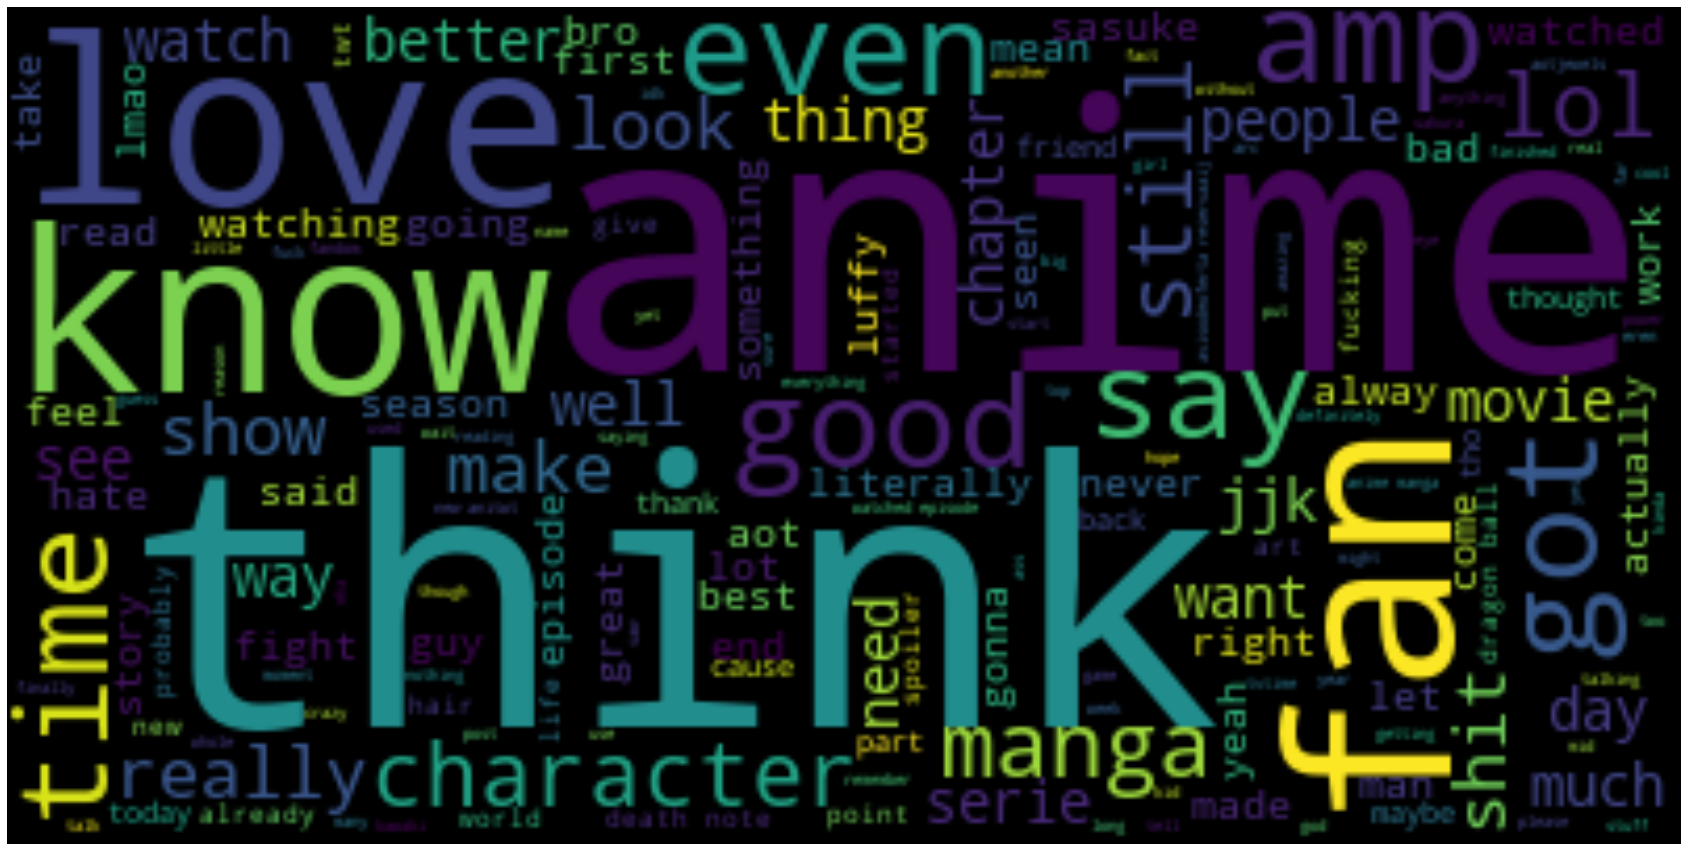

In [12]:
wordcloud =  create_wordcloud(' '.join(tweets_analysis_df['tweet']))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [13]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [14]:
positive = 0
negative = 0
neutral = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for i in range(tweets_analysis_df.shape[0]):
    #print(tweet.text)
    tweet = tweets_analysis_df.iloc[i]['tweet']
    tweet_list.append(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg'] 
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
 
    if neg > pos:
        negative_list.append(tweet)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet)
        neutral += 1
positive = percentage(positive, tweets_analysis_df.shape[0])
negative = percentage(negative, tweets_analysis_df.shape[0])
neutral = percentage(neutral, tweets_analysis_df.shape[0])
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [15]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  95689
positive number:  41101
negative number:  25811
neutral number:  28777


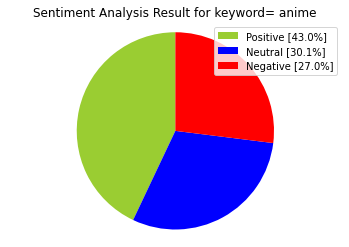

In [16]:
keyword = "anime"
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

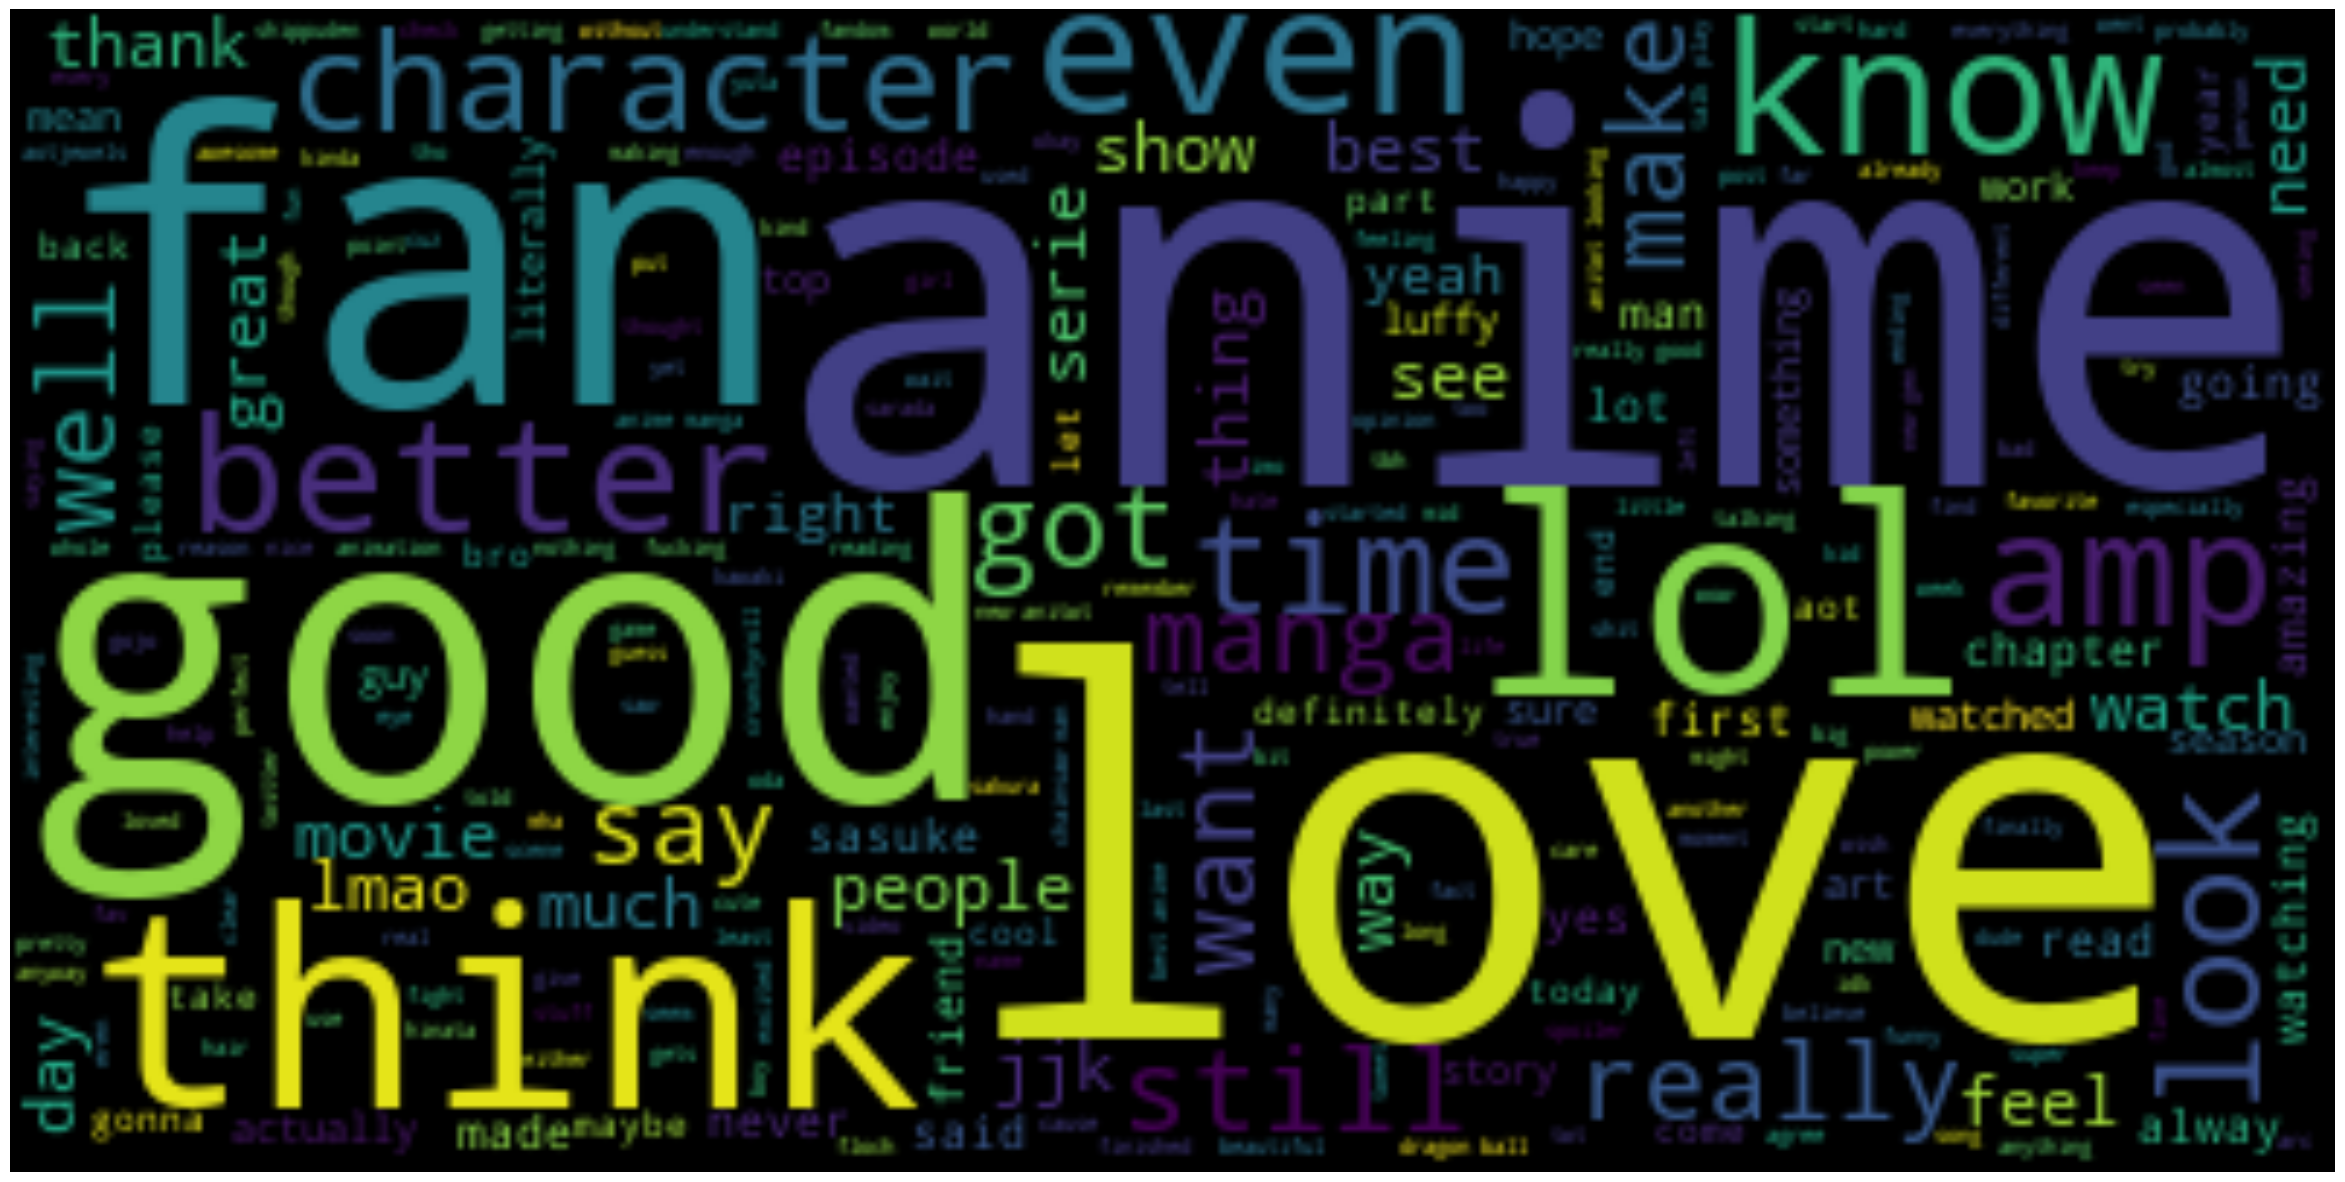

In [17]:
wordcloud = create_wordcloud(' '.join(positive_list[0]))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

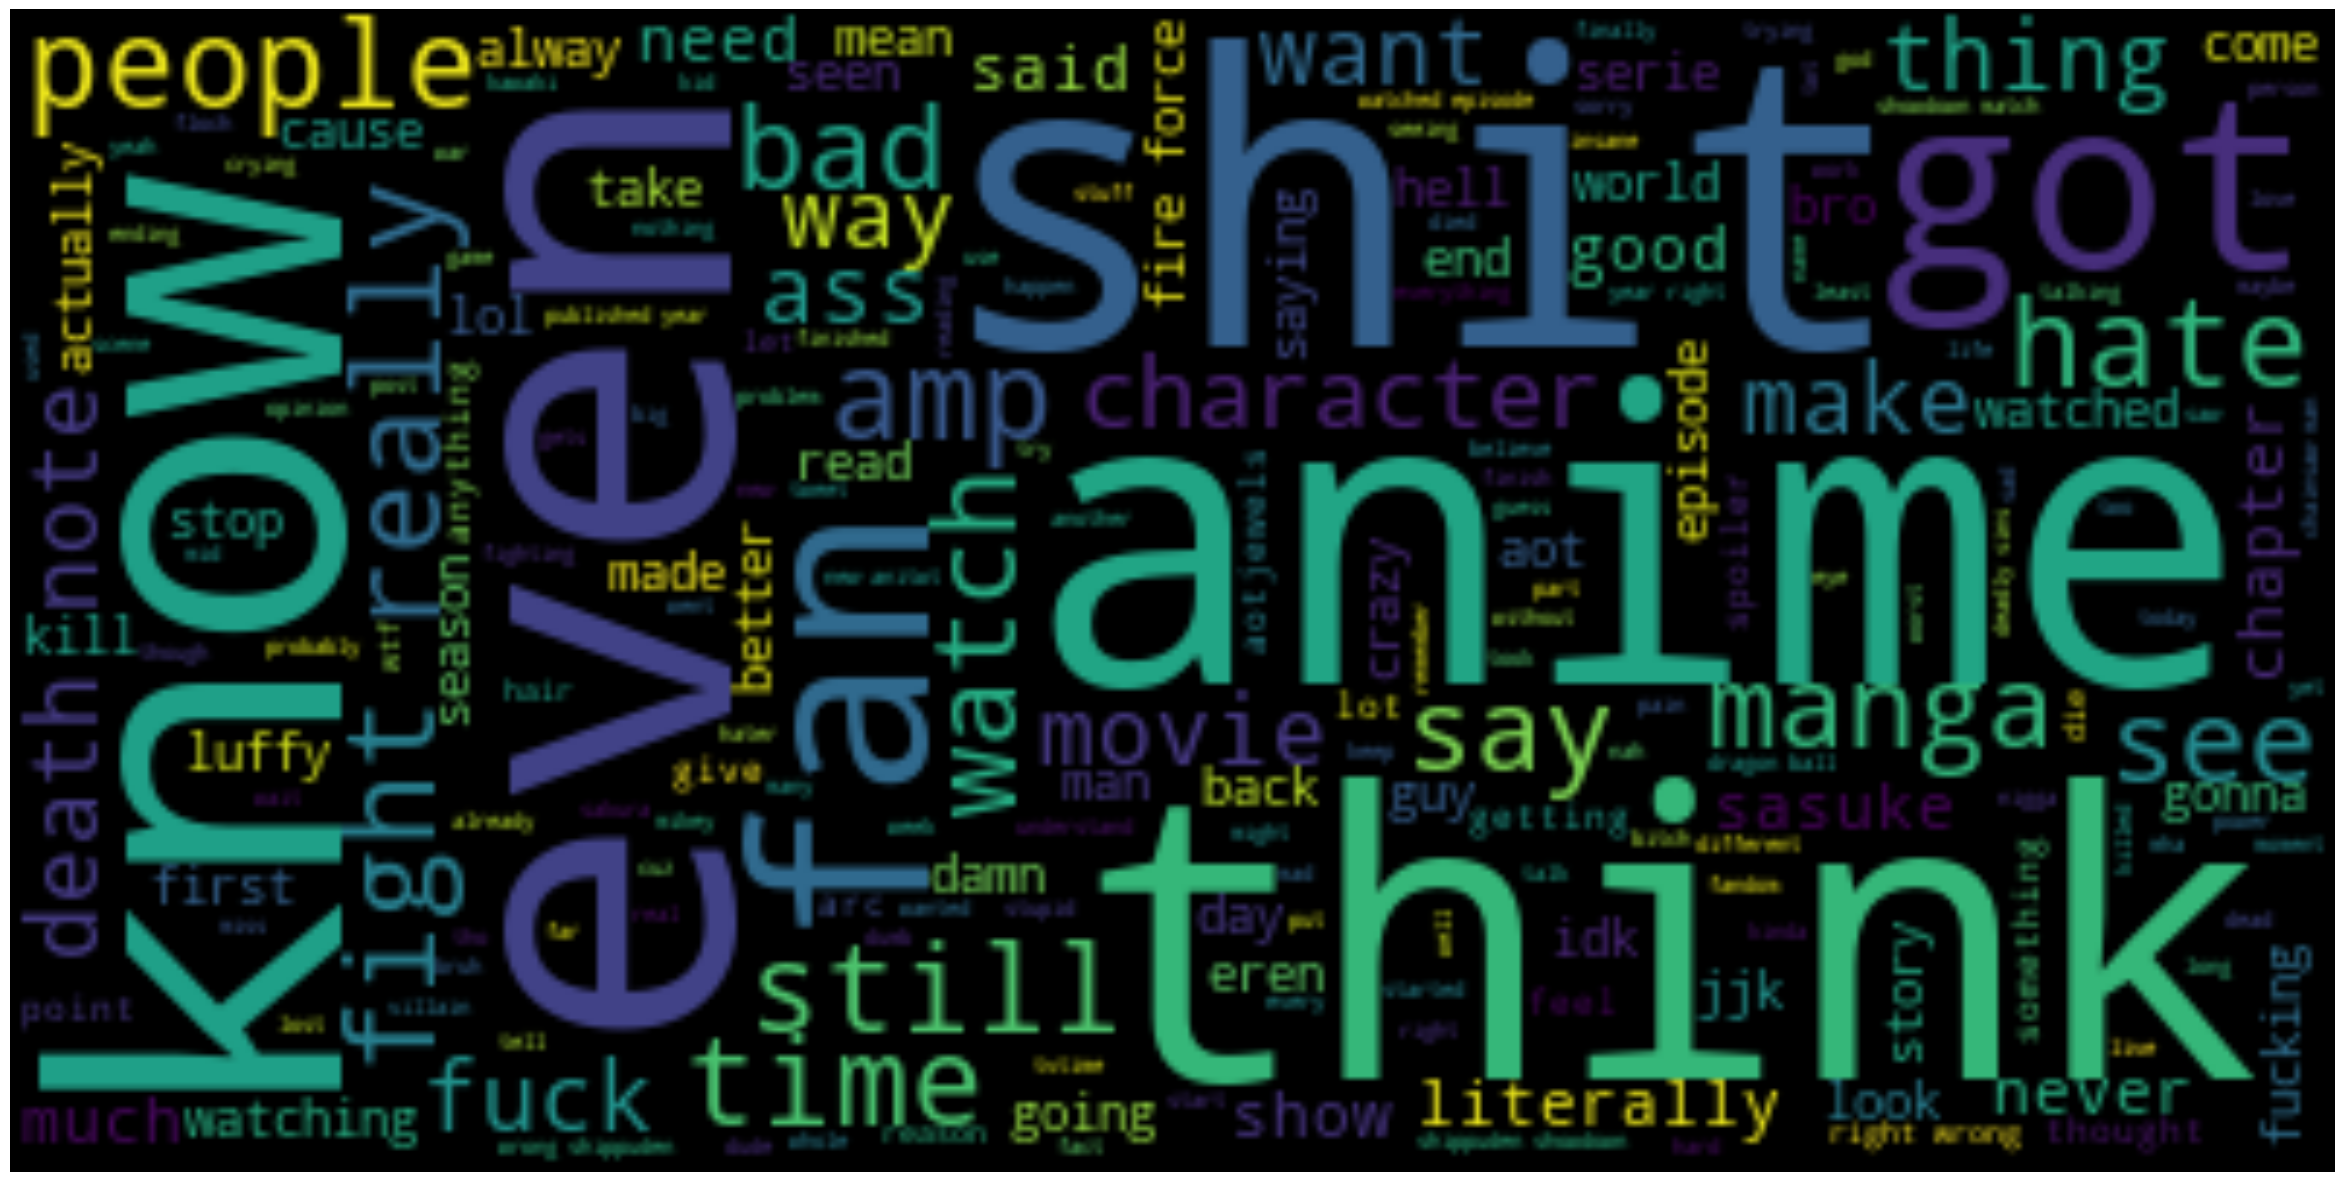

In [18]:
wordcloud = create_wordcloud(' '.join(negative_list[0]))
fig = plt.figure(1,figsize=(30, 50))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [19]:
text = ' '.join(negative_list[0])
text_dictionary = wordcloud.process_text(text)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq = wordcloud.words_

#print results
print("Most frequent words")
print(list(word_freq.items())[0:50])

Most frequent words
[('attack titan', 4317), ('https', 4188), ('naruto', 2972), ('tokyo revenger', 2934), ('one piece', 2436), ('demon slayer', 2145), ('jujutsu kaisen', 2074), ('boruto', 1888), ('black clover', 1695), ('bleach', 1681), ('one', 1382), ('shit', 1253), ('anime', 1169), ('think', 849), ('even', 848), ('hunter hunter', 838), ('know', 807), ('got', 799), ('people', 759), ('fight', 668), ('amp', 667), ('still', 663), ('bad', 640), ('time', 611), ('really', 609), ('hate', 605), ('character', 580), ('see', 576), ('say', 568), ('fuck', 560), ('make', 552), ('way', 543), ('death note', 538), ('manga', 524), ('literally', 498), ('thing', 493), ('ass', 486), ('good', 477), ('want', 474), ('show', 470), ('said', 455), ('need', 454), ('much', 454), ('blackclover twt', 448), ('never', 447), ('look', 425), ('serie', 419), ('going', 410), ('bro', 401), ('naruto shippuden', 384)]
Least frequent words
[('gushikendelf tuvari', 1), ('tuvari yulestia', 1), ('yulestia ameno', 1), ('ameno uru